### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVC,SVR
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score,\
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, mean_absolute_percentage_error, balanced_accuracy_score #MAPE para regresión, balanced_acc para CLASIFIC

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [7]:
df = pd.read_csv('./data/drugLibTrain_raw.tsv', sep='\t')

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [10]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

In [16]:
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Valores únicos en la columna '{column}': {unique_values}")

Valores únicos en la columna 'Unnamed: 0': 3107
Valores únicos en la columna 'urlDrugName': 502
Valores únicos en la columna 'rating': 10
Valores únicos en la columna 'effectiveness': 5
Valores únicos en la columna 'sideEffects': 5
Valores únicos en la columna 'condition': 1426
Valores únicos en la columna 'benefitsReview': 3031
Valores únicos en la columna 'sideEffectsReview': 2813
Valores únicos en la columna 'commentsReview': 3046


In [54]:
df.describe(include='all')

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_1 = df[['rating', 'effectiveness', 'sideEffects']]

In [19]:
df_1

,rating,effectiveness,sideEffects
0,4,Highly Effective,Mild Side Effects
1,1,Highly Effective,Severe Side Effects
2,10,Highly Effective,No Side Effects
3,3,Marginally Effective,Mild Side Effects
4,2,Marginally Effective,Severe Side Effects
...,...,...,...
3102,10,Highly Effective,Mild Side Effects
3103,1,Ineffective,Extremely Severe Side Effects
3104,2,Marginally Effective,Moderate Side Effects
3105,8,Considerably Effective,Mild Side Effects


In [22]:
df_1_dumm = pd.get_dummies(df_1, columns=['effectiveness', 'sideEffects'], dtype=int)
# df_1_dumm = pd.get_dummies(df[['efective', 'sideEffects']], dtype=int) 

In [23]:
df_1_dumm

,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,4,0,1,0,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,0,1
2,10,0,1,0,0,0,0,0,0,1,0
3,3,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3102,10,0,1,0,0,0,0,1,0,0,0
3103,1,0,0,1,0,0,1,0,0,0,0
3104,2,0,0,0,1,0,0,0,1,0,0
3105,8,1,0,0,0,0,0,1,0,0,0


In [24]:
my_dict = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [25]:
my_dict_2 = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [26]:
df_1['effectiveness'] = df_1['effectiveness'].map(my_dict)
df_1['sideEffects'] = df_1['sideEffects'].map(my_dict_2)

In [27]:
df_1

,rating,effectiveness,sideEffects
0,4,4,1
1,1,4,3
2,10,4,0
3,3,1,1
4,2,1,3
...,...,...,...
3102,10,4,1
3103,1,0,4
3104,2,1,2
3105,8,3,1


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [55]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_1)
                for k in range(2, 21)]

# no aparece el n_clusters 8 porq viene por defecto
# kmeans de 1 no tiene sentido

In [56]:
kmeans_per_k

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42),
 KMeans(n_clusters=20, random_state=42)]

Mayor silhouette scores con K=2

In [59]:
silhouette_scores =[silhouette_score(df_1, model.labels_)for model in kmeans_per_k]
silhouette_scores

[0.6190969508782411,
 0.4541665291694327,
 0.416701237123931,
 0.4152173517501398,
 0.40776675491666886,
 0.4044764199227224,
 0.3887036746255966,
 0.4139468434587661,
 0.40740876245511143,
 0.4310097927318671,
 0.41912862408038365,
 0.45984445240995503,
 0.4448386290466004,
 0.4811118973055916,
 0.4695772796209039,
 0.46198189887903474,
 0.484789428962796,
 0.4984087298544331,
 0.5211853528472431]

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

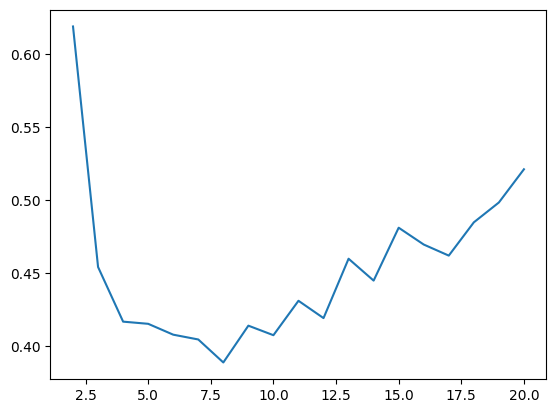

In [64]:
plt.plot(range(2,21), silhouette_scores)

In [65]:
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[11137.736723639344,
 7254.022835331666,
 5690.593041671108,
 4799.917418448654,
 4234.666975562949,
 3783.4071304392573,
 3345.210728306218,
 2981.3527909129807,
 2745.4130964698347,
 2603.126355649415,
 2414.859302540516,
 2288.182515913502,
 2137.506944046979,
 1987.1375814445873,
 1898.8198318273608,
 1904.7463184767562,
 1747.3184792761588,
 1674.786452531707,
 1585.2378422857328]

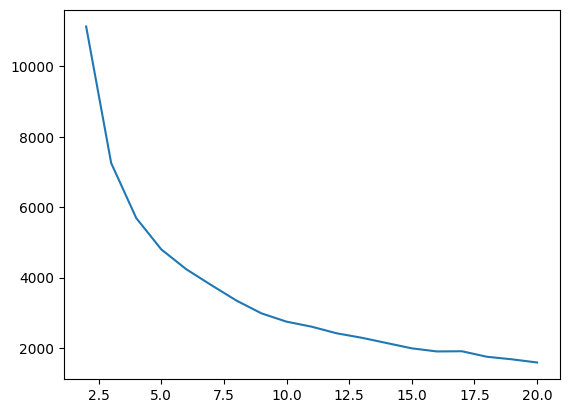

In [66]:
plt.plot(range(2,21), inertias)


In [69]:
kmeans  = KMeans(n_clusters=2, random_state=42).fit(df_1)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [73]:
# plt.figure(figsize=(8, 3.5))
# plt.plot(range(2, 21), inertias, "bo-")
# plt.xlabel("$k$", fontsize=14)
# plt.ylabel("Inertia", fontsize=14)
# plt.annotate('Elbow',
#              xy=(4, inertias[2]),
#              xytext=(0.55, 0.55),
#              textcoords='figure fraction',
#              fontsize=16,
#              arrowprops=dict(facecolor='black', shrink=0.1)
#             )


# con todo esto, podriamos graficar mejro e indicar dónde está el codo

In [70]:
# df_kmeans = pd.DataFrame(inertias, columns=['inertia'])
# df_kmeans['inertia_1'] = df_kmeans['inertia'].shift(1)
# df_kmeans['diff%'] = df_kmeans['inertia']/df_kmeans['inertia_1']
# df_kmeans

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [71]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=['Cluster'])
df_clusters.head()
# este df lo puedo unir al inicial (reseteando index) para añadir una caracteristica más 

,Cluster
0,1
1,1
2,0
3,1
4,1


In [74]:
df_clusters.shape

(3107, 1)

<Axes: ylabel='count'>

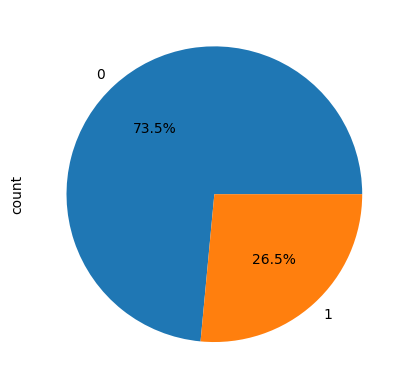

In [72]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")

CAMILO CORRECLACION 
DEF DE ONEHOTENCODER
Y LA DEF DE JUAN DE no es correlacion pero la relacion entre variables 

graficar nevajas buscar en una libreria que te la hga sola